In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [ ]:
DATADIR = r"/content/drive/MyDrive/deep learning/images"
categories = ["mattar_paneer","beetroot_halwa","bhindi_fry", "chicken_biryani", "chicken_lollipop",
              "dal_makhani", "egg_burji", "jalebi", "jeera_aloo", "kaju_katli", 
              "palak_paneer", "Parotta", "poori", "rasgulla", "vada"]
training_data = []
def create_train():
    for cat in categories:
        path = os.path.join(DATADIR,cat)
        class_num = categories.index(cat)
        for img in os.listdir(path):
            try:
                img_a = load_img(os.path.join(DATADIR,cat,img))
                img_array = img_to_array(img_a)
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
create_train()

In [ ]:
X = []
y = []
for feat,label in training_data:
    X.append(feat)
    y.append(label)
X = np.array(X)
X/=255
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=69)

In [ ]:
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(200, 200, 3)),
    layers.experimental.preprocessing.RandomRotation((-0.2, 0.3)),
])

rescale_ = models.Sequential([
    layers.experimental.preprocessing.Resizing(200, 200, input_shape=[None,None,3]),
])

lossFN = 'sparse_categorical_crossentropy'
optimizerFN = tf.keras.optimizers.Adam(learning_rate=0.0005)

cnn = models.Sequential([

    rescale_,

    data_augmentation,
    
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Dropout(0.2),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),


    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),

    layers.Dropout(0.2),

    layers.Dense(32,activation = 'relu'),
    
    layers.Dense(15, activation='softmax')
])
cnn.compile(optimizer=optimizerFN,
              loss= lossFN,
              metrics=['accuracy'])

In [ ]:
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(200, 200, 3)),
    layers.experimental.preprocessing.RandomRotation((-0.2, 0.3)),
])

rescale_ = models.Sequential([
    layers.experimental.preprocessing.Resizing(200, 200, input_shape=[None,None,3]),
])

lossFN = 'sparse_categorical_crossentropy'
optimizerFN = tf.keras.optimizers.Adam(learning_rate=0.0005)

mod = models.Sequential([

    rescale_,

    data_augmentation,
    
    layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Dropout(0.2),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),


    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),

    layers.Dropout(0.2),

    layers.Dense(32,activation = 'relu'),
    
    layers.Dense(15, activation='softmax')
])
mod.compile(optimizer=optimizerFN,
              loss= lossFN,
              metrics=['accuracy'])

In [ ]:
dm = mod.fit(X_train,y_train,batch_size = 16, validation_split = 0.05, epochs=118)

Epoch 1/118
146/146 [==============================] - 6s 29ms/step - loss: 2.6471 - accuracy: 0.0997 - val_loss: 2.5863 - val_accuracy: 0.1545
Epoch 2/118
146/146 [==============================] - 4s 27ms/step - loss: 2.4096 - accuracy: 0.1558 - val_loss: 2.3271 - val_accuracy: 0.1220
Epoch 3/118
146/146 [==============================] - 4s 29ms/step - loss: 2.3434 - accuracy: 0.1721 - val_loss: 2.3117 - val_accuracy: 0.1301
Epoch 4/118
146/146 [==============================] - 4s 27ms/step - loss: 2.2703 - accuracy: 0.1892 - val_loss: 2.2602 - val_accuracy: 0.1870
Epoch 5/118
146/146 [==============================] - 4s 27ms/step - loss: 2.2243 - accuracy: 0.2102 - val_loss: 2.1066 - val_accuracy: 0.2764
Epoch 6/118
146/146 [==============================] - 4s 27ms/step - loss: 2.0477 - accuracy: 0.2885 - val_loss: 1.8539 - val_accuracy: 0.3821
Epoch 7/118
146/146 [==============================] - 4s 27ms/step - loss: 1.9172 - accuracy: 0.3241 - val_loss: 1.7691 - val_accuracy:

In [ ]:
cnn.evaluate(X_train, y_train)

In [ ]:
mod.evaluate(X_test, y_test)

14/14 [==============================] - 1s 23ms/step - loss: 1.3747 - accuracy: 0.7235


[1.3747081756591797, 0.7235022783279419]

In [ ]:
mod.save("Zirpy73.h5")

In [ ]:
cnn.save("Zirpy73_actual.h5")

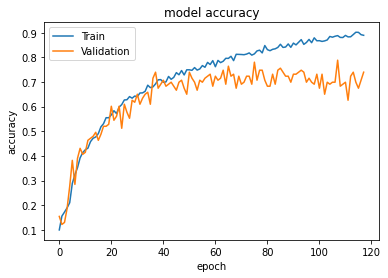

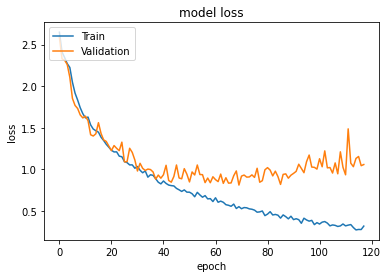

In [ ]:
plt.plot(dm.history['accuracy'])
plt.plot(dm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(dm.history['loss'])
plt.plot(dm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

14/14 [==============================] - 0s 17ms/step
0.7205437105177174


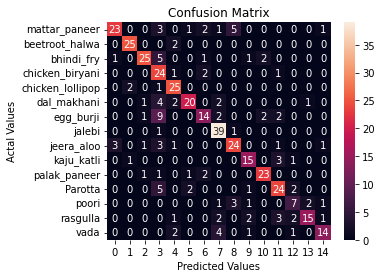

Values of:  mattar_paneer
precision:  0.8518518518518519
recall:  0.6388888888888888
f-score:  0.7301587301587301
support 36
i = 0
Values of:  beetroot_halwa
precision:  0.8928571428571429
recall:  0.9259259259259259
f-score:  0.9090909090909091
support 27
i = 1
Values of:  bhindi_fry
precision:  0.8620689655172413
recall:  0.7142857142857143
f-score:  0.7812500000000001
support 35
i = 2
Values of:  chicken_biryani
precision:  0.42857142857142855
recall:  0.8571428571428571
f-score:  0.5714285714285714
support 28
i = 3
Values of:  chicken_lollipop
precision:  0.7352941176470589
recall:  0.8928571428571429
f-score:  0.806451612903226
support 28
i = 4
Values of:  dal_makhani
precision:  0.8333333333333334
recall:  0.6666666666666666
f-score:  0.7407407407407408
support 30
i = 5
Values of:  egg_burji
precision:  0.6666666666666666
recall:  0.4666666666666667
f-score:  0.5490196078431373
support 30
i = 6
Values of:  jalebi
precision:  0.7647058823529411
recall:  0.9512195121951219
f-score:

In [ ]:
from sklearn.metrics import f1_score, precision_recall_fscore_support, confusion_matrix
import pandas as pd
import seaborn as sns

y_pred = np.argmax(cnn.predict(X_test), axis=-1)

print(f1_score(y_test, y_pred, average="macro"))
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=categories)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
for i in range(len(categories)):
  print("Values of: ", categories[i])
  print("precision: ",precision_recall_fscore_support(y_test, y_pred)[0][i])
  print("recall: ",precision_recall_fscore_support(y_test, y_pred)[1][i])
  print("f-score: ", precision_recall_fscore_support(y_test, y_pred)[2][i])
  print("support", precision_recall_fscore_support(y_test, y_pred)[3][i])
  print("i =",i)
  print("="*10)